In [1]:
# Official
import pandas
import copy
import numpy
import torch
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from torch.utils.data import DataLoader

# Custom
from utils import modify_space_data
from torch_model import SpaceData, CustomModel, trainer

In [2]:
# Load training data
train_data_path: "str" = "~/Desktop/spaceship_titanic/data/train.csv"
train_data: "DataFrame" = pandas.read_csv(train_data_path)

# Load test data
test_data_path: "str" = "~/Desktop/spaceship_titanic/data/test.csv"
test_data: "DataFrame" = pandas.read_csv(test_data_path)

## Notes
- PassengerId: Must be split into group number and group member
- HomePlanet: Is class variable with 3 classes
- CryoSleep: Is boolean variable
- Cabin: Must be split into three class variables
- Age: A numeric variable
- VIP: A boolean variable
- RoomService: Numeric, predominantly 0
- FoodCourt: Numeric, predominantly 0
- ShoppingMall: Numeric, predominantly 0
- Spa: Numeric, predominantly 0
- VRDeck: Numeric, predominantly 0
- Name: Purely ID based (Can be used for identifying families)
- Transported: Boolean variable

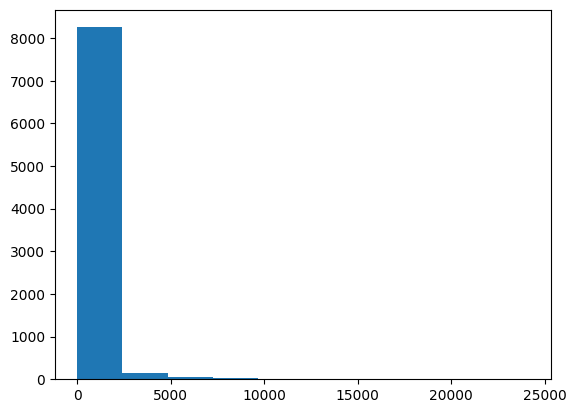

True     4378
False    4315
Name: Transported, dtype: int64

In [3]:
# Code for analysing features

# For showing number of unique entries
train_data.nunique()

# For showing histograms of different columns
plt.hist(train_data["VRDeck"])
plt.show()

# For showing the counts of unique values in a column
train_data["Transported"].value_counts().sort_values(ascending=False)

In [4]:
subject: "str" = "Transported"

edit_data: "DataFrame" = modify_space_data(train_data)

labels: "DataFrame" = copy.deepcopy(edit_data[subject])
features: "DataFrame" = copy.deepcopy(edit_data.drop([subject], axis=1))

validation_size: "float" = 0.2
random_state: "int" = 2

train_features, val_features, train_labels, val_labels = train_test_split(features,labels,test_size=validation_size,random_state=random_state)
test_features: "DataFrame" = modify_space_data(test_data)

In [5]:
logistic_model: "LogisticRegression" = LogisticRegression(penalty="l2", max_iter=10000, random_state=random_state)
fitted_model = logistic_model.fit(train_features, train_labels)
logistic_accuracy: "float" = fitted_model.score(val_features, val_labels)

print(logistic_accuracy)

fitted_model.predict(test_features)

0.80448533640023


array([ True, False,  True, ...,  True,  True,  True])

In [12]:
space_train_dataset = SpaceData(X=train_features,y=train_labels)
space_val_dataset = SpaceData(X=val_features,y=val_labels)
space_test_dataset = SpaceData(X=test_features,y=test_features["Age"])

space_train_dataloader = DataLoader(dataset=space_train_dataset, batch_size=len(space_train_dataset), shuffle=True)
space_val_dataloader = DataLoader(dataset=space_val_dataset, batch_size=len(space_val_dataset), shuffle=True)
space_test_dataloader = DataLoader(dataset=space_test_dataset, batch_size=len(space_test_dataset), shuffle=True)

Now's the time to get out the big guns (PyTorch)

In [7]:
custom_model = CustomModel()

loss_model = torch.nn.BCELoss()

optimiser = torch.optim.SGD(custom_model.parameters(), lr=10 ** (-4))

In [9]:
trainer(
    train_dataloader=space_train_dataloader,
    val_dataloader=space_val_dataloader,
    custom_model=custom_model,
    loss_model=loss_model,
    optimiser=optimiser,
    iterations=1000,
    print_stats=True
)

loss: 0.604505, accuracy: 0.787234  [    1/ 1000]
loss: 0.605067, accuracy: 0.787809  [    2/ 1000]
loss: 0.604310, accuracy: 0.786659  [    3/ 1000]
loss: 0.603733, accuracy: 0.786659  [    4/ 1000]
loss: 0.603186, accuracy: 0.787234  [    5/ 1000]
loss: 0.602774, accuracy: 0.787809  [    6/ 1000]
loss: 0.602329, accuracy: 0.787234  [    7/ 1000]
loss: 0.602018, accuracy: 0.787234  [    8/ 1000]
loss: 0.601612, accuracy: 0.787234  [    9/ 1000]
loss: 0.601386, accuracy: 0.787234  [   10/ 1000]
loss: 0.600967, accuracy: 0.787234  [   11/ 1000]
loss: 0.600837, accuracy: 0.787234  [   12/ 1000]
loss: 0.600341, accuracy: 0.787234  [   13/ 1000]
loss: 0.600374, accuracy: 0.787234  [   14/ 1000]
loss: 0.599688, accuracy: 0.787234  [   15/ 1000]
loss: 0.600037, accuracy: 0.788384  [   16/ 1000]
loss: 0.598934, accuracy: 0.787234  [   17/ 1000]
loss: 0.599943, accuracy: 0.787809  [   18/ 1000]
loss: 0.597942, accuracy: 0.786659  [   19/ 1000]
loss: 0.600410, accuracy: 0.787809  [   20/ 1000]


In [21]:
with torch.no_grad():
    for (X,_) in space_test_dataloader:
        predictions = custom_model(X).round()
torch.tensor(predictions, dtype=bool)

/tmp/ipykernel_15668/3099664285.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(predictions, dtype=bool)


tensor([[ True],
        [False],
        [ True],
        ...,
        [ True],
        [ True],
        [False]])